Refined Requirement Analysis (Cluster Groupings):
                                         Requirement  Cluster
0  The system should allow users to reset their p...        2
1  Users need to be able to upload profile pictures.        1
2        The system must support multiple languages.        1
3   Allow users to recover their accounts via email.        0
4  Provide multi-language support in the applicat...        1
5            Enable image uploads for user profiles.        1
6      Allow users to reset passwords through email.        2
7  Support account recovery through email verific...        0
8  The system should provide password recovery op...        2
9  The application must allow profile image uploads.        1


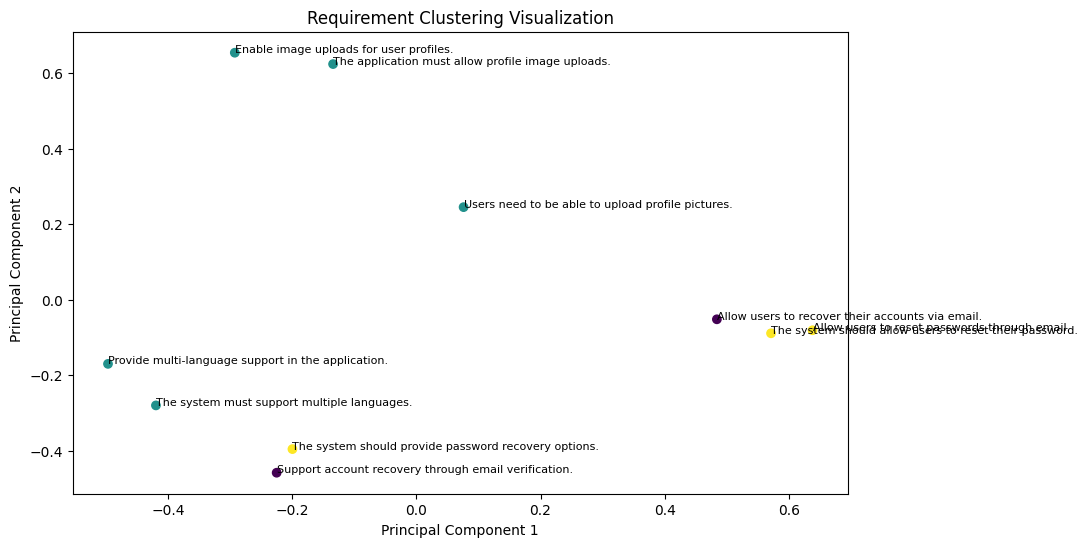

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample user requirements data (collected from surveys, feedback, etc.)
data = {
    'Requirement': [
        "The system should allow users to reset their password.",
        "Users need to be able to upload profile pictures.",
        "The system must support multiple languages.",
        "Allow users to recover their accounts via email.",
        "Provide multi-language support in the application.",
        "Enable image uploads for user profiles.",
        "Allow users to reset passwords through email.",
        "Support account recovery through email verification.",
        "The system should provide password recovery options.",
        "The application must allow profile image uploads."
    ]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Step 1: Feature extraction using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Requirement'])

# Step 2: Apply KMeans clustering to group similar requirements
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(tfidf_matrix)
df['Cluster'] = kmeans.labels_

# Step 3: Output the refined requirements with cluster groupings
print("Refined Requirement Analysis (Cluster Groupings):")
print(df)

# Step 4: Visualizing the clustering results using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(tfidf_matrix.toarray())
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis')
plt.title("Requirement Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Annotate points with requirement texts
for i in range(len(df)):
    plt.text(df['PC1'][i], df['PC2'][i], df['Requirement'][i], fontsize=8)

plt.show()
